## K-Means Clustering 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from pathlib import Path 

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/Course_work_1/Census.csv')
df.dtypes

Person ID                      int64
Region                        object
Residence Type                object
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

In [3]:
kmeans_df= df.sample(n=1000, random_state = 1)

kmeans_df = kmeans_df.drop(columns=['No of hours', 'Person ID'])
display(kmeans_df)
kmeans_df.columns

# kmeans_df = df.drop(columns=['No of hours', 'Person ID'])

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
257725,E12000007,H,2,1,2,4,2,2,2,1,3,2,7,2,10,-9,1
298417,E12000005,C,-9,3,1,1,1,1,2,1,1,9,-9,-9,-9,-9,-9
440058,E12000008,H,2,1,1,3,2,2,2,1,1,2,1,1,7,3,1
352710,E12000004,H,2,1,2,3,2,2,1,3,1,2,1,2,10,2,1
150562,E12000005,H,2,1,1,6,2,2,1,2,1,1,5,2,10,-9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26574,E12000009,H,1,1,2,2,1,1,1,1,1,2,6,-9,-9,-9,2
27204,E12000009,H,5,1,1,1,1,1,1,3,1,2,-9,-9,-9,-9,-9
399993,E12000008,H,3,1,1,4,1,2,1,1,1,8,1,8,3,3,4
371276,E12000007,H,5,1,1,5,1,2,1,1,1,9,2,1,8,2,1


Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Industry', 'Hours worked per week', 'Approximated Social Grade'],
      dtype='object')

In [4]:
#mapping 
family_comp = {
    1 : "Not in a family", 
    2: "Married/same-sex civil partnership couple family", 
    3: "Cohabiting couple family",
    4: "Lone parent family (male head)",
    5: "Lone parent family (female head)", 
    6: "Other related family", 
    -9: "No code required"
}
population_base = {
    1: "Usual resident",
    2: "Student living away from home during term-time",
    3: "Short-term resident"
}
sex = {
    1: "Male",
    2: "Female"
}
age = {
    1: "0to15",
    2: "16to24",
    3: "25to34",
    4:"35to44",
    5: "45to54",
    6: "55to64",
    7: "65to74",
    8: "75 and over"
}
marital_status = {
    1: "Single (never married or never registered a same-sex civil partnership)",
    2: "Married or in a registered same-sex civil partnership",
    3: "Separated but still legally married or separated but still legally in a same-sex civil partnership",
    4: "Divorced or formerly in a same-sex civil partnership which is now legally dissolved",
    5: "Widowed or surviving partner from a same-sex civil partnership",
}
student = {
    1:" Yes",
    2: "No"
}
country_of_birth = {
    1: "UK",
    2: "Non UK",
    -9: "No code required"
}
health = {
    1: "Very good health",
    2: "Good health",
    3: "Fair health",
    4: "Bad health",
    5: "Very bad health",
    -9: "No code required"
}
ethnic_group = {
    1: "White", 
    2: "Mixed", 
    3: "Asian and Asian British", 
    4: "Black or Black British", 
    5: "Chinese or Other ethnic group",
    -9: "No code required"
}
religion = {
    1: "No religion",
    2: "Christian",
    3: "Buddhist",
    4: "Hindu",
    5: "Jewish",
    6: "Muslim",
    7: "Sikh",
    8: "Other religion",
    9: "Not stated",
    -9:" No code required "
}
economic_activity = {
    1: "Economically active: Employee",
    2: "Economically active: Self-employed",
    3: "Economically active: Unemployed",
    4: "Economically active: Full-time student",
    5: "Economically inactive: Retired",
    6: "Economically inactive: Student",
    7:" Economically inactive: Looking after home or family",
    8: "Economically inactive: Long-term sick or disabled",
    9: "Economically inactive: Other",
    -9: "No code required",
}
occupation = {
    1: "Managers, Directors and Senior Officials",
    2: "Professional Occupations",
    3:" Associate Professional and Technical Occupations",
    4: "Administrative and Secretarial Occupations",
    5: "Skilled Trades Occupations",
    6:" Caring, Leisure and Other Service Occupations",
    7: "Sales and Customer Service Occupations",
    8: "Process, Plant and Machine Operatives",
    9: "Elementary Occupations",
    -9: "No code required ",
    }
industry = {
    1: "Agriculture, forestry and fishing",
    2: "Mining and quarrying; Manufacturing;Electricity, gas, steam and air conditioning system; Water supply",
    3: "Construction",
    4: "Wholesale and retail trade; Repair of motor vehicles and motorcycles",
    5: "Accommodation and food service activities",
    6: "Transport and storage; Information and communication",
    7: "Financial and insurance activities; Intermediation",
    8: "Real estate activities; Professional, scientific and technical activities; Administrative and support service activities",
    9: "Public administration and defence; compulsory social security",
    10: "Education",
    11: "Human health and social work activities",
    12: "Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies",
    -9: "No code required "
}
hours_worked_per_week = {
    1: "Part-time: 15 or less hours worked",
    2:"Part-time: 16 to 30 hours worked",
    3: "Full-time: 31 to 48 hours worked",
    4: "Full-time: 49 or more hours worked",
    -9: "No code required",
}
approx_sc_grade = {
    1: "AB",
    2: "C1",
    3: "C2",
    4: "DE",
    -9: "No code required"
}

In [5]:
kmeans_df['Family Composition'].replace(family_comp, inplace = True)
kmeans_df['Population Base'].replace(population_base, inplace = True)
kmeans_df['Sex'].replace(sex, inplace = True)
kmeans_df['Age'].replace(age, inplace = True)
kmeans_df['Marital Status'].replace(marital_status, inplace = True)
kmeans_df['Student'].replace(student, inplace = True)
kmeans_df['Country of Birth'].replace(country_of_birth, inplace = True)
kmeans_df['Health'].replace(health, inplace = True)
kmeans_df['Ethnic Group'].replace(ethnic_group, inplace = True)
kmeans_df['Religion'].replace(religion, inplace = True)
kmeans_df['Economic Activity'].replace(economic_activity, inplace = True)
kmeans_df['Occupation'].replace(occupation, inplace = True)
kmeans_df['Industry'].replace(industry, inplace = True)
kmeans_df['Hours worked per week'].replace(hours_worked_per_week, inplace = True)
kmeans_df['Approximated Social Grade'].replace(approx_sc_grade, inplace = True)
kmeans_df.head(10)

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
257725,E12000007,H,Married/same-sex civil partnership couple family,Usual resident,Female,35to44,Married or in a registered same-sex civil part...,No,Non UK,Very good health,Asian and Asian British,Christian,Economically inactive: Looking after home or ...,Professional Occupations,Education,No code required,AB
298417,E12000005,C,No code required,Short-term resident,Male,0to15,Single (never married or never registered a sa...,Yes,Non UK,Very good health,White,Not stated,No code required,No code required,No code required,No code required,No code required
440058,E12000008,H,Married/same-sex civil partnership couple family,Usual resident,Male,25to34,Married or in a registered same-sex civil part...,No,Non UK,Very good health,White,Christian,Economically active: Employee,"Managers, Directors and Senior Officials",Financial and insurance activities; Intermedia...,Full-time: 31 to 48 hours worked,AB
352710,E12000004,H,Married/same-sex civil partnership couple family,Usual resident,Female,25to34,Married or in a registered same-sex civil part...,No,UK,Fair health,White,Christian,Economically active: Employee,Professional Occupations,Education,Part-time: 16 to 30 hours worked,AB
150562,E12000005,H,Married/same-sex civil partnership couple family,Usual resident,Male,55to64,Married or in a registered same-sex civil part...,No,UK,Good health,White,No religion,Economically inactive: Retired,Professional Occupations,Education,No code required,C1
296165,W92000004,C,No code required,Usual resident,Male,16to24,Single (never married or never registered a sa...,Yes,UK,Very good health,White,No religion,Economically inactive: Student,No code required,No code required,No code required,No code required
543642,E12000009,H,Married/same-sex civil partnership couple family,Usual resident,Male,25to34,Married or in a registered same-sex civil part...,No,UK,Good health,White,No religion,Economically active: Employee,Professional Occupations,Mining and quarrying; Manufacturing;Electricit...,Full-time: 49 or more hours worked,AB
9483,E12000003,H,Married/same-sex civil partnership couple family,Usual resident,Female,0to15,Single (never married or never registered a sa...,Yes,UK,Very good health,White,Christian,No code required,No code required,No code required,No code required,No code required
277643,W92000004,H,Married/same-sex civil partnership couple family,Usual resident,Female,35to44,Married or in a registered same-sex civil part...,No,UK,Fair health,White,No religion,Economically inactive: Looking after home or ...,"Caring, Leisure and Other Service Occupations","Other community, social and personal service a...",No code required,C2
135961,E12000003,H,Married/same-sex civil partnership couple family,Usual resident,Female,55to64,Married or in a registered same-sex civil part...,No,UK,Fair health,White,Christian,Economically inactive: Retired,"Caring, Leisure and Other Service Occupations",Accommodation and food service activities,No code required,C2


In [6]:
sample = kmeans_df.copy()

In [7]:
# #encoding categorical variables 
# or_enc = OrdinalEncoder()
# kmeans_enc_df = or_enc.fit_transform(kmeans_df)
# kmeans_coded_df = pd.DataFrame(kmeans_enc_df, columns = kmeans_df.columns)
# kmeans_coded_df

In [8]:
#trying with label encoder
le_enc = LabelEncoder()


for col in sample:
    sample[col] = le_enc.fit_transform(sample[col])
sample[sample['Region'] == 3]

                                                           


,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
352710,3,1,3,2,0,2,1,1,2,1,5,2,1,7,3,4,0
125923,3,1,2,2,1,0,3,1,2,5,5,6,9,5,7,2,4
126098,3,1,0,2,1,0,3,0,2,2,5,2,9,5,7,2,4
293973,3,0,4,2,1,3,3,1,2,5,5,2,6,6,6,2,4
314626,3,1,5,2,1,4,0,1,2,1,5,7,3,9,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454582,3,1,0,2,1,3,3,1,2,5,5,6,1,9,12,0,2
140132,3,1,3,2,0,0,3,0,2,5,5,6,9,5,7,2,4
418180,3,1,3,2,1,5,1,1,2,2,5,2,1,6,6,0,2
11678,3,1,3,2,1,2,1,1,2,2,5,6,4,3,0,2,1


In [9]:
#standardise the data 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sample)
scaled_features
scaled_features_kmeans = pd.DataFrame(scaled_features, index=kmeans_df.index, columns=kmeans_df.columns)
scaled_features_kmeans.head(10)

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
257725,0.502367,0.156813,0.188562,0.122260,-1.012073,0.063300,-0.932871,0.549621,-2.155528,0.994076,-3.019191,-0.780764,-1.318427,0.909113,-1.132118,0.290532,-1.496798
298417,-0.263436,-6.377042,0.845571,-13.462139,0.988071,-1.322824,0.791475,-1.819435,-2.155528,0.994076,0.384632,1.570934,1.375294,0.158090,0.070663,0.290532,1.362415
440058,0.885268,0.156813,0.188562,0.122260,0.988071,-0.398742,-0.932871,0.549621,-2.155528,0.994076,0.384632,-0.780764,-1.019124,-0.217421,-0.831423,-1.388845,-1.496798
352710,-0.646338,0.156813,0.188562,0.122260,-1.012073,-0.398742,-0.932871,0.549621,0.380387,-1.269045,0.384632,-0.780764,-1.019124,0.909113,-1.132118,1.969910,-1.496798
150562,-0.263436,0.156813,0.188562,0.122260,0.988071,0.987382,-0.932871,0.549621,0.380387,-0.703265,0.384632,1.100595,0.776689,0.909113,-1.132118,0.290532,-0.781995
296165,1.651071,-6.377042,0.845571,0.122260,0.988071,-0.860783,0.791475,-1.819435,0.380387,0.994076,0.384632,1.100595,1.075992,0.158090,0.070663,0.290532,1.362415
543642,1.268169,0.156813,0.188562,0.122260,0.988071,-0.398742,-0.932871,0.549621,0.380387,-0.703265,0.384632,1.100595,-1.019124,0.909113,-0.230032,-0.549157,-1.496798
9483,-1.029239,0.156813,0.188562,0.122260,-1.012073,-1.322824,0.791475,-1.819435,0.380387,0.994076,0.384632,-0.780764,1.375294,0.158090,0.070663,0.290532,1.362415
277643,1.651071,0.156813,0.188562,0.122260,-1.012073,0.063300,-0.932871,0.549621,0.380387,-1.269045,0.384632,1.100595,-1.318427,-1.343955,0.371359,0.290532,-0.067191
135961,-1.029239,0.156813,0.188562,0.122260,-1.012073,0.987382,-0.932871,0.549621,0.380387,-1.269045,0.384632,-0.780764,0.776689,-1.343955,-2.034205,0.290532,-0.067191


## KMeans 

In [79]:
kmeans = KMeans(n_clusters=2, random_state=1)

In [80]:
kmeans.fit(scaled_features_kmeans)

KMeans(n_clusters=2, random_state=1)

In [81]:
kmeans.cluster_centers_

array([[-2.85048802e-03,  7.51393287e-02,  6.81099721e-02,
         1.22259590e-01,  1.88902490e-03,  4.49617576e-01,
        -3.05400755e-01,  5.36459657e-01,  3.52210506e-02,
        -2.05063960e-01,  6.03233017e-02, -1.12358910e-02,
        -4.38810397e-01, -3.22731105e-02, -1.66217762e-02,
        -1.42140666e-01, -3.54105484e-01, -6.66133815e-16],
       [ 7.32982634e-03, -1.93215417e-01, -1.75139928e-01,
        -3.14381802e-01, -4.85749261e-03, -1.15615948e+00,
         7.85316227e-01, -1.37946769e+00, -9.05684160e-02,
         5.27307327e-01, -1.55117061e-01,  2.88922911e-02,
         1.12836959e+00,  8.29879983e-02,  4.27417101e-02,
         3.65504571e-01,  9.10556958e-01,  1.00000000e+00]])

In [82]:
# Compute the silhouette score 
kmeans_silhouette = silhouette_score(scaled_features_kmeans, kmeans.labels_).round(2)
kmeans_silhouette

0.2

In [14]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


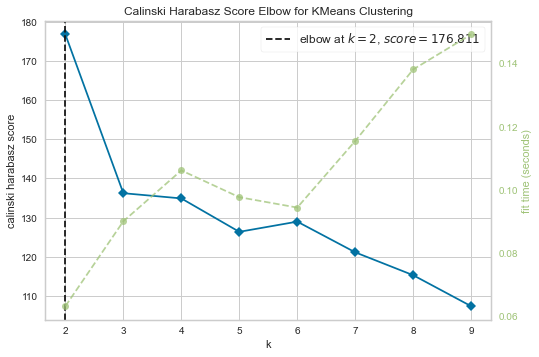

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_kmeans)        # Fit the data to the visualizer
visualizer.show()                            # Finalize and render the figure

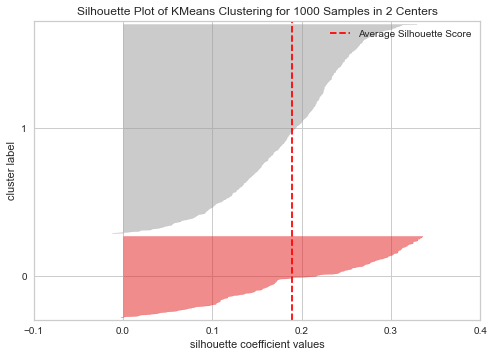

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
#SilhouetteVisualizer
model = KMeans(n_clusters = 2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_features_kmeans)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Text(0.5, 1.0, 'K_Means')

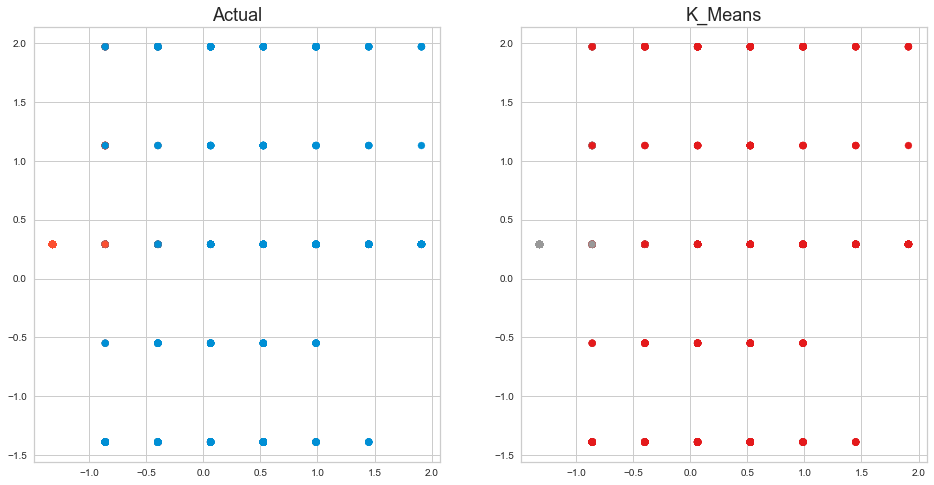

In [17]:
#visualising the clusters
fig, axes = plt.subplots(1, 2, figsize=(16,8))

fte_colors = {0: "#008fd5", 1: "#fc4f30"}
   
km_colors = [fte_colors[label] for label in kmeans.labels_]

axes[0].scatter(scaled_features_kmeans['Age'], scaled_features_kmeans['Hours worked per week'], c=km_colors)
#axes[1].scatter(scaled_features_adult['age'], scaled_features_adult['hours-per-week'], \
#                c=scaled_features_adult['k_means'], cmap=plt.cm.Set1)
axes[1].scatter(scaled_features_kmeans['Age'], scaled_features_kmeans['Hours worked per week'], c=kmeans.labels_, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)



In [18]:
#append dataframe with cluster number
scaled_features_kmeans['Cluster'] = kmeans.labels_

In [19]:
kmeans_df['Cluster'] = kmeans.labels_

<AxesSubplot:xlabel='Age', ylabel='Economic Activity'>

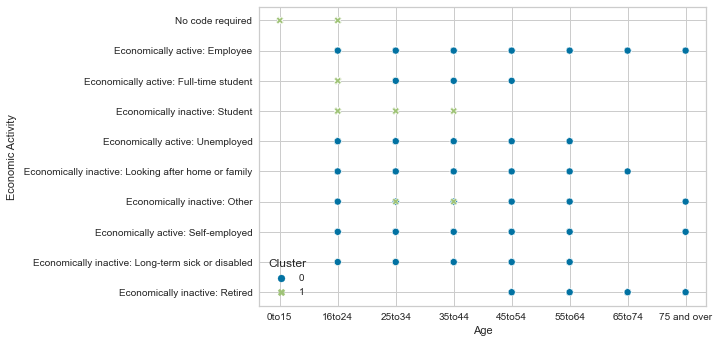

In [20]:
kmeans_df.sort_values(by=['Age'], ascending = True, inplace= True)
sns.scatterplot(x='Age', y='Economic Activity', data= kmeans_df, hue='Cluster', style="Cluster")

In [22]:
kmeans_df.groupby('Cluster').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
Cluster,,,,,,,,,,,,,,,,,
0,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720
1,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280


## Describing cluster=0

In [47]:
cluster_0 = kmeans_df[kmeans_df['Cluster'] ==0]
cluster_0

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
481380,E12000002,H,Married/same-sex civil partnership couple family,Usual resident,Male,16to24,Single (never married or never registered a sa...,No,UK,Very good health,White,Christian,Economically active: Employee,Associate Professional and Technical Occupations,Public administration and defence; compulsory ...,Full-time: 31 to 48 hours worked,C1,0
415262,E12000006,H,Cohabiting couple family,Usual resident,Male,16to24,Single (never married or never registered a sa...,No,UK,Very good health,White,Christian,Economically active: Employee,Associate Professional and Technical Occupations,Public administration and defence; compulsory ...,Full-time: 31 to 48 hours worked,C1,0
281144,W92000004,H,Married/same-sex civil partnership couple family,Usual resident,Male,16to24,Single (never married or never registered a sa...,No,UK,Very good health,White,Christian,Economically active: Unemployed,Elementary Occupations,Construction,No code required,AB,0
421477,E12000009,H,Married/same-sex civil partnership couple family,Usual resident,Male,16to24,Single (never married or never registered a sa...,No,UK,Very good health,White,No religion,Economically active: Employee,"Caring, Leisure and Other Service Occupations","Real estate activities; Professional, scientif...",Full-time: 31 to 48 hours worked,C1,0
83518,E12000008,H,Married/same-sex civil partnership couple family,Usual resident,Male,16to24,Single (never married or never registered a sa...,No,UK,Good health,White,Buddhist,Economically active: Unemployed,No code required,No code required,No code required,AB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297952,W92000004,C,No code required,Usual resident,Male,75 and over,Married or in a registered same-sex civil part...,No,UK,Very bad health,White,Christian,Economically inactive: Retired,Professional Occupations,Education,No code required,No code required,0
181100,E12000002,H,Not in a family,Usual resident,Male,75 and over,Widowed or surviving partner from a same-sex c...,No,UK,Fair health,White,Christian,Economically inactive: Retired,Administrative and Secretarial Occupations,Human health and social work activities,No code required,C1,0
148921,E12000005,H,Not in a family,Usual resident,Female,75 and over,Widowed or surviving partner from a same-sex c...,No,UK,Good health,White,Not stated,Economically inactive: Retired,Professional Occupations,Human health and social work activities,No code required,C1,0
95970,E12000009,H,Not in a family,Usual resident,Male,75 and over,Single (never married or never registered a sa...,No,UK,Good health,White,Christian,Economically inactive: Retired,Professional Occupations,Education,No code required,AB,0


In [49]:
cluster_0.groupby('Student').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
Student,,,,,,,,,,,,,,,,,
Yes,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
No,716,716,716,716,716,716,716,716,716,716,716,716,716,716,716,716,716


In [50]:
cluster_0.groupby('Economic Activity').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
Economic Activity,,,,,,,,,,,,,,,,,
Economically inactive: Looking after home or family,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Economically active: Employee,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
Economically active: Full-time student,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Economically active: Self-employed,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
Economically active: Unemployed,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Economically inactive: Long-term sick or disabled,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Economically inactive: Other,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Economically inactive: Retired,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155


In [51]:
cluster_0.groupby('Approximated Social Grade').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Cluster
Approximated Social Grade,,,,,,,,,,,,,,,,,
AB,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
C1,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203
C2,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
DE,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194
No code required,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


## Describing cluster 1

In [53]:
cluster_1 = kmeans_df[kmeans_df['Cluster'] ==1]
cluster_1

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
143382,E12000008,H,Married/same-sex civil partnership couple family,Usual resident,Female,0to15,Single (never married or never registered a sa...,No,UK,Very good health,Asian and Asian British,Muslim,No code required,No code required,No code required,No code required,No code required,1
181702,E12000002,H,Lone parent family (female head),Usual resident,Female,0to15,Single (never married or never registered a sa...,Yes,UK,Very good health,White,Christian,No code required,No code required,No code required,No code required,No code required,1
2833,E12000001,H,Lone parent family (female head),Usual resident,Female,0to15,Single (never married or never registered a sa...,Yes,UK,Good health,Black or Black British,Christian,No code required,No code required,No code required,No code required,No code required,1
193038,E12000003,H,Cohabiting couple family,Usual resident,Female,0to15,Single (never married or never registered a sa...,No,UK,Very good health,White,Christian,No code required,No code required,No code required,No code required,No code required,1
269341,E12000007,H,Lone parent family (female head),Usual resident,Female,0to15,Single (never married or never registered a sa...,Yes,UK,Good health,White,Christian,No code required,No code required,No code required,No code required,No code required,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110403,E12000008,H,No code required,Short-term resident,Female,25to34,Single (never married or never registered a sa...,Yes,Non UK,Very good health,White,Christian,Economically inactive: Student,Associate Professional and Technical Occupations,"Real estate activities; Professional, scientif...",No code required,No code required,1
248378,E12000007,H,Lone parent family (female head),Usual resident,Female,25to34,Single (never married or never registered a sa...,No,UK,Very good health,White,No religion,Economically inactive: Other,No code required,No code required,No code required,DE,1
67985,E12000006,H,Lone parent family (female head),Usual resident,Female,35to44,Widowed or surviving partner from a same-sex c...,Yes,UK,Very good health,White,Christian,Economically inactive: Student,"Caring, Leisure and Other Service Occupations",Human health and social work activities,No code required,C1,1
188798,E12000002,H,Cohabiting couple family,Usual resident,Male,35to44,Divorced or formerly in a same-sex civil partn...,Yes,UK,Very good health,White,No religion,Economically inactive: Student,Skilled Trades Occupations,Construction,No code required,C1,1


In [54]:
cluster_1.groupby('Student').count()/cluster_1.count()

,Age,Approximated Social Grade,Cluster,Country of Birth,Economic Activity,Ethnic Group,Family Composition,Health,Hours worked per week,Industry,Marital Status,Occupation,Population Base,Region,Religion,Residence Type,Sex,Student
Student,,,,,,,,,,,,,,,,,,
Yes,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,0.814286,NaN
No,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,0.185714,NaN


In [58]:
cluster_1.groupby(['Age']).count()

,Region,Residence Type,Family Composition,Population Base,Sex,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
Age,,,,,,,,,,,,,,,,,
0to15,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194
16to24,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
25to34,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
35to44,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [59]:
cluster_1.groupby('Economic Activity').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
Economic Activity,,,,,,,,,,,,,,,,,
Economically active: Employee,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Economically active: Full-time student,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Economically active: Unemployed,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Economically inactive: Long-term sick or disabled,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Economically inactive: Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Economically inactive: Student,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
No code required,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205


In [61]:
cluster_1.groupby('Approximated Social Grade').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Cluster
Approximated Social Grade,,,,,,,,,,,,,,,,,
C1,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
DE,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
No code required,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219


In [62]:
cluster_1.groupby('Religion').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
Religion,,,,,,,,,,,,,,,,,
No code required,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Buddhist,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Christian,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
Hindu,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Jewish,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Muslim,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
No religion,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
Not stated,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Other religion,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [63]:
cluster_1.groupby('Health').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
Health,,,,,,,,,,,,,,,,,
Bad health,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Fair health,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Good health,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
No code required,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Very good health,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204


In [30]:
228/280

0.8142857142857143

In [32]:
716/720

0.9944444444444445

In [33]:
#properties of each cluster 
cus_1 = scaled_features_kmeans[scaled_features_kmeans['Cluster'] == 0]
cus_2 = scaled_features_kmeans[scaled_features_kmeans['Cluster'] == 1]

In [34]:
scaled_features_kmeans.groupby('Cluster').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
Cluster,,,,,,,,,,,,,,,,,
0,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720
1,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280


In [35]:
cus_1_mean = kmeans.cluster_centers_[0]
cus_2_mean = kmeans.cluster_centers_[1]

In [36]:
cus_1['Age'].unique()

array([ 0.06329967, -0.39874169,  0.98738237,  1.91146508,  1.44942373,
        0.52534102, -0.86078304])

In [37]:
cus_2.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.0
mean,0.007330,-0.193215,-0.175140,-0.314382,-0.004857,-1.156159,0.785316,-1.379468,-0.090568,0.527307,-0.155117,0.028892,1.128370,0.082988,0.042742,0.365505,0.910557,1.0
std,1.016424,1.473862,0.926814,1.856466,1.001837,0.277401,0.163110,0.922919,1.273335,0.791792,1.119119,1.037774,0.591163,0.525697,0.582666,0.336356,0.869796,0.0
min,-1.795042,-6.377042,-1.782466,-13.462139,-1.012073,-1.322824,-1.795044,-1.819435,-4.691444,-1.834826,-3.019191,-1.721443,-1.019124,-1.719466,-2.034205,-1.388845,-0.781995,1.0
25%,-1.029239,0.156813,-1.125457,0.122260,-1.012073,-1.322824,0.791475,-1.819435,0.380387,-0.137485,0.384632,-0.780764,1.075992,0.158090,0.070663,0.290532,1.362415,1.0
50%,0.119465,0.156813,0.188562,0.122260,0.988071,-1.322824,0.791475,-1.819435,0.380387,0.994076,0.384632,-0.780764,1.375294,0.158090,0.070663,0.290532,1.362415,1.0
75%,0.885268,0.156813,0.188562,0.122260,0.988071,-0.860783,0.791475,-1.819435,0.380387,0.994076,0.384632,1.100595,1.375294,0.158090,0.070663,0.290532,1.362415,1.0
max,1.651071,0.156813,2.159590,0.122260,0.988071,0.063300,1.653647,0.549621,0.380387,0.994076,0.384632,2.511614,1.375294,1.660135,1.574141,1.969910,1.362415,1.0


In [38]:
kmeans_df.groupby('Region').count()

,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
Region,,,,,,,,,,,,,,,,,
E12000001,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
E12000002,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125
E12000003,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
E12000004,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
E12000005,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
E12000006,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
E12000007,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162
E12000008,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154
E12000009,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79


In [39]:
#for first 10 features 
cus_1_mean_p1 = cus_1_mean[:]
cus_2_mean_p1 = cus_2_mean[:]
cus_1_mean_p1

array([-0.00285049,  0.07513933,  0.06810997,  0.12225959,  0.00188902,
        0.44961758, -0.30540075,  0.53645966,  0.03522105, -0.20506396,
        0.0603233 , -0.01123589, -0.4388104 , -0.03227311, -0.01662178,
       -0.14214067, -0.35410548])

In [40]:
X = cus_1.keys()[:-1]
len(X)

17

In [41]:
X_axis = np.arange(len(X))
len(X_axis)

17

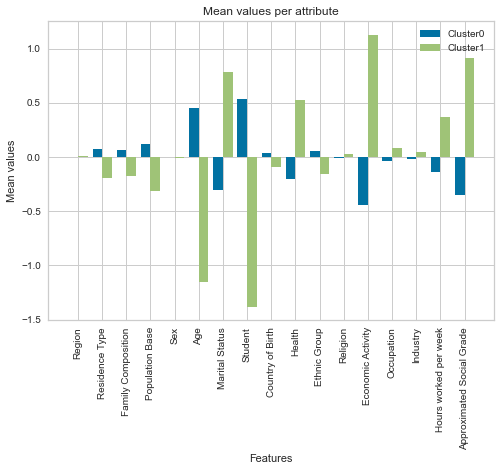

In [42]:
X = cus_1.keys()[:-1]

  
X_axis = np.arange(len(X))

  
plt.bar(X_axis - 0.2, cus_1_mean_p1, 0.4, label = 'Cluster0')
plt.bar(X_axis + 0.2, cus_2_mean_p1, 0.4, label = 'Cluster1')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Features")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [43]:
sample

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
257725,6,1,3,2,0,3,1,1,1,5,0,2,0,7,3,2,0
298417,4,0,4,0,1,0,3,0,1,5,5,7,9,5,7,2,4
440058,7,1,3,2,1,2,1,1,1,5,5,2,1,4,4,0,0
352710,3,1,3,2,0,2,1,1,2,1,5,2,1,7,3,4,0
150562,4,1,3,2,1,5,1,1,2,2,5,6,7,7,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26574,8,1,5,2,0,1,3,0,2,5,5,2,8,5,7,2,1
27204,8,1,1,2,1,0,3,0,2,1,5,2,9,5,7,2,4
399993,7,1,0,2,1,3,3,1,2,5,5,8,1,6,2,0,3
371276,6,1,1,2,1,4,3,1,2,5,5,7,3,4,10,4,0


In [44]:
scaled_features_kmeans

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
257725,0.502367,0.156813,0.188562,0.122260,-1.012073,0.063300,-0.932871,0.549621,-2.155528,0.994076,-3.019191,-0.780764,-1.318427,0.909113,-1.132118,0.290532,-1.496798,0
298417,-0.263436,-6.377042,0.845571,-13.462139,0.988071,-1.322824,0.791475,-1.819435,-2.155528,0.994076,0.384632,1.570934,1.375294,0.158090,0.070663,0.290532,1.362415,1
440058,0.885268,0.156813,0.188562,0.122260,0.988071,-0.398742,-0.932871,0.549621,-2.155528,0.994076,0.384632,-0.780764,-1.019124,-0.217421,-0.831423,-1.388845,-1.496798,0
352710,-0.646338,0.156813,0.188562,0.122260,-1.012073,-0.398742,-0.932871,0.549621,0.380387,-1.269045,0.384632,-0.780764,-1.019124,0.909113,-1.132118,1.969910,-1.496798,0
150562,-0.263436,0.156813,0.188562,0.122260,0.988071,0.987382,-0.932871,0.549621,0.380387,-0.703265,0.384632,1.100595,0.776689,0.909113,-1.132118,0.290532,-0.781995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26574,1.268169,0.156813,1.502580,0.122260,-1.012073,-0.860783,0.791475,-1.819435,0.380387,0.994076,0.384632,-0.780764,1.075992,0.158090,0.070663,0.290532,-0.781995,1
27204,1.268169,0.156813,-1.125457,0.122260,0.988071,-1.322824,0.791475,-1.819435,0.380387,-1.269045,0.384632,-0.780764,1.375294,0.158090,0.070663,0.290532,1.362415,1
399993,0.885268,0.156813,-1.782466,0.122260,0.988071,0.063300,0.791475,0.549621,0.380387,0.994076,0.384632,2.041274,-1.019124,0.533602,-1.432814,-1.388845,0.647612,0
371276,0.502367,0.156813,-1.125457,0.122260,0.988071,0.525341,0.791475,0.549621,0.380387,0.994076,0.384632,1.570934,-0.420520,-0.217421,0.972750,1.969910,-1.496798,0


In [45]:
c_1 = kmeans_df[kmeans_df['Cluster']==0].sort_values(by = ['Age'], ascending = True)
filepath = Path("/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/Course_work_1/csv/kmeans/c_1.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)  
c_1.to_csv(filepath) 

In [46]:
c_2 = kmeans_df[kmeans_df['Cluster']==1].sort_values(by = ['Age'], ascending = True)
filepath = Path("/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/Course_work_1/csv/kmeans/c_2.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)  
c_2.to_csv(filepath) 

In [39]:
#transforming multidimensionality to one 

#transform n variiables to 2 principal components to plot
pca = PCA(n_components=2)
pca_fit = pca.fit(scaled_features_kmeans)
principalComponents = pca_fit.transform(scaled_features_kmeans)
principalDf = pd.DataFrame(data = principalComponents
         , columns = ['principal component 1', 'principal component 2'])


In [40]:
principalDf

,principal component 1,principal component 2
0,-1.017664,2.380892
1,6.207104,7.683420
2,-1.376417,1.085718
3,-1.519975,0.210443
4,-1.255191,-0.226529
...,...,...
995,1.793028,0.221195
996,2.646897,-0.685166
997,-0.193920,-1.924691
998,-0.504495,-1.062665


In [41]:
C_transformed = pca.fit_transform(kmeans.cluster_centers_)
C_transformed

array([[ 1.78122874e+00,  8.44462503e-17],
       [-1.78122874e+00,  8.44462503e-17]])

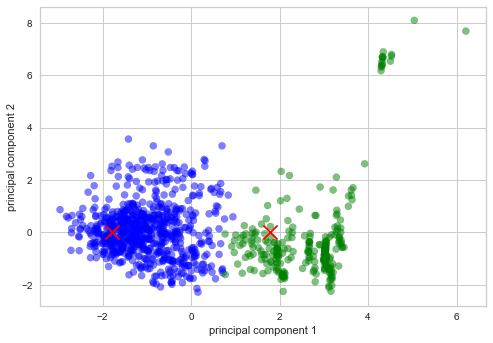

In [42]:
numClusters = 2
colors =['red','green','blue','cyan','yellow', 'lime','orange','coral','brown','peru','khaki','tan']
centroidColor= ['red']

dataPointColor=[]
for row in kmeans.labels_:
    if row == 0: 
        dataPointColor.append('blue')
    else:
        dataPointColor.append('green')
                          
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], 
c=dataPointColor, s=50, alpha=0.5)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.scatter(C_transformed[:, 0], C_transformed[:, 1], c=centroidColor, s=200, marker=('x'))
plt.show()

# for item in range(numClusters):
#   centroidColor.append(colors[item])





## KMeans cluster 3 

In [64]:
kmeans_3_sample = kmeans_df.copy()

In [65]:
kmeans3_df = kmeans_df.copy()

In [66]:
kmeans_3_sample

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
143382,E12000008,H,Married/same-sex civil partnership couple family,Usual resident,Female,0to15,Single (never married or never registered a sa...,No,UK,Very good health,Asian and Asian British,Muslim,No code required,No code required,No code required,No code required,No code required,1
181702,E12000002,H,Lone parent family (female head),Usual resident,Female,0to15,Single (never married or never registered a sa...,Yes,UK,Very good health,White,Christian,No code required,No code required,No code required,No code required,No code required,1
2833,E12000001,H,Lone parent family (female head),Usual resident,Female,0to15,Single (never married or never registered a sa...,Yes,UK,Good health,Black or Black British,Christian,No code required,No code required,No code required,No code required,No code required,1
193038,E12000003,H,Cohabiting couple family,Usual resident,Female,0to15,Single (never married or never registered a sa...,No,UK,Very good health,White,Christian,No code required,No code required,No code required,No code required,No code required,1
269341,E12000007,H,Lone parent family (female head),Usual resident,Female,0to15,Single (never married or never registered a sa...,Yes,UK,Good health,White,Christian,No code required,No code required,No code required,No code required,No code required,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297952,W92000004,C,No code required,Usual resident,Male,75 and over,Married or in a registered same-sex civil part...,No,UK,Very bad health,White,Christian,Economically inactive: Retired,Professional Occupations,Education,No code required,No code required,0
181100,E12000002,H,Not in a family,Usual resident,Male,75 and over,Widowed or surviving partner from a same-sex c...,No,UK,Fair health,White,Christian,Economically inactive: Retired,Administrative and Secretarial Occupations,Human health and social work activities,No code required,C1,0
148921,E12000005,H,Not in a family,Usual resident,Female,75 and over,Widowed or surviving partner from a same-sex c...,No,UK,Good health,White,Not stated,Economically inactive: Retired,Professional Occupations,Human health and social work activities,No code required,C1,0
95970,E12000009,H,Not in a family,Usual resident,Male,75 and over,Single (never married or never registered a sa...,No,UK,Good health,White,Christian,Economically inactive: Retired,Professional Occupations,Education,No code required,AB,0


In [67]:
#trying with label encoder
le_enc = LabelEncoder()


for col in sample:
    kmeans_3_sample[col] = le_enc.fit_transform(kmeans_3_sample[col])
kmeans_3_sample


,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
143382,7,1,3,2,0,0,3,1,2,5,0,5,9,5,7,2,4,1
181702,1,1,1,2,0,0,3,0,2,5,5,2,9,5,7,2,4,1
2833,0,1,1,2,0,0,3,0,2,2,1,2,9,5,7,2,4,1
193038,2,1,0,2,0,0,3,1,2,5,5,2,9,5,7,2,4,1
269341,6,1,1,2,0,0,3,0,2,2,5,2,9,5,7,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297952,9,0,4,2,1,7,1,1,2,4,5,2,7,7,3,2,4,0
181100,1,1,5,2,1,7,4,1,2,1,5,2,7,2,5,2,1,0
148921,4,1,5,2,0,7,4,1,2,2,5,7,7,7,5,2,1,0
95970,8,1,5,2,1,7,3,1,2,2,5,2,7,7,3,2,0,0


In [68]:
#standardise the data 
scaler = StandardScaler()
scaled_features3 = scaler.fit_transform(kmeans_3_sample)
scaled_features3
scaled_features_kmeans3 = pd.DataFrame(scaled_features3, index=kmeans_df.index, columns=kmeans_df.columns)
scaled_features_kmeans3.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,Cluster
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.030287e-16,-2.380318e-16,-1.463274e-15,2.269018e-16,9.436896e-17,-8.894219e-15,1.527667e-16,-6.274092e-15,-4.970468e-16,-2.020606e-16,1.222467e-15,-9.692247e-16,-2.222833e-15,9.259260e-17,1.090239e-16,7.922552e-16,2.614575e-16,3.562928e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.795042e+00,-6.377042e+00,-1.782466e+00,-1.346214e+01,-1.012073e+00,-1.322824e+00,-1.795044e+00,-1.819435e+00,-4.691444e+00,-1.834826e+00,-3.019191e+00,-1.721443e+00,-1.318427e+00,-1.719466e+00,-2.034205e+00,-1.388845e+00,-1.496798e+00,-6.236096e-01
25%,-1.029239e+00,1.568125e-01,-1.125457e+00,1.222596e-01,-1.012073e+00,-8.607830e-01,-9.328709e-01,5.496211e-01,3.803873e-01,-7.032650e-01,3.846320e-01,-7.807638e-01,-1.019124e+00,-5.929323e-01,-5.307275e-01,-1.388845e+00,-7.819945e-01,-6.236096e-01
50%,1.194652e-01,1.568125e-01,1.885617e-01,1.222596e-01,9.880711e-01,6.329967e-02,7.914746e-01,5.496211e-01,3.803873e-01,-1.374846e-01,3.846320e-01,-7.807638e-01,-1.212174e-01,1.580903e-01,7.066343e-02,2.905324e-01,-6.719149e-02,-6.236096e-01
75%,8.852680e-01,1.568125e-01,1.885617e-01,1.222596e-01,9.880711e-01,9.873824e-01,7.914746e-01,5.496211e-01,3.803873e-01,9.940762e-01,3.846320e-01,1.100595e+00,1.075992e+00,9.091129e-01,9.727498e-01,2.905324e-01,6.476116e-01,1.603567e+00
max,1.651071e+00,1.568125e-01,2.159590e+00,1.222596e-01,9.880711e-01,1.911465e+00,1.653647e+00,5.496211e-01,3.803873e-01,9.940762e-01,3.846320e-01,2.511614e+00,1.375294e+00,1.660135e+00,1.574141e+00,1.969910e+00,1.362415e+00,1.603567e+00


In [69]:
kmeans3 = KMeans(n_clusters=3, random_state=1)

In [70]:
kmeans3.fit(scaled_features_kmeans3)

KMeans(n_clusters=3, random_state=1)

In [71]:
# Compute the silhouette score 
kmeans_silhouette3 = silhouette_score(scaled_features_kmeans3, kmeans.labels_).round(2)
kmeans_silhouette3

0.02

In [72]:
# #SilhouetteVisualizer
# visualizer = SilhouetteVisualizer(model)

# visualizer.fit(scaled_features_kmeans3)    # Fit the data to the visualizer
# visualizer.poof()    # Draw/show/poof the data

In [73]:
#append dataframe with cluster number
scaled_features_kmeans3['Cluster'] = kmeans3.labels_

In [74]:
kmeans3_df['Cluster'] = kmeans3.labels_

<AxesSubplot:xlabel='Age', ylabel='Economic Activity'>

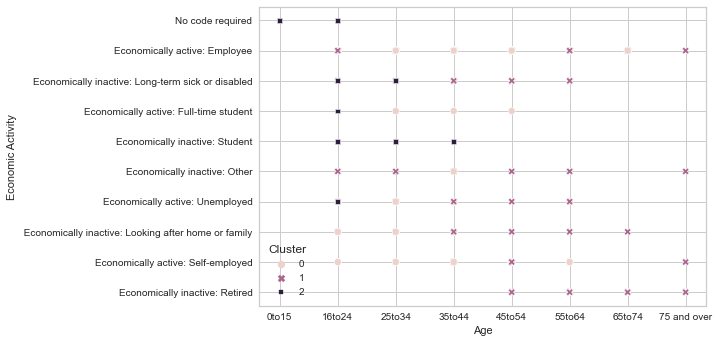

In [75]:
kmeans3_df.sort_values(by=['Age'], ascending = True, inplace= True)
sns.scatterplot(x='Age', y='Economic Activity', data= kmeans3_df, hue='Cluster', style="Cluster")

In [76]:
kmeans3_df.groupby('Cluster').count()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
Cluster,,,,,,,,,,,,,,,,,
0,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361
1,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359
2,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280


In [77]:
# k3_c_1 = kmeans3_df[kmeans3_df['Cluster']==0]
# filepath = Path("/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/Course_work_1/csv/kmeans/k3_c_1.csv")
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# k3_c_1.to_csv(filepath) 

In [57]:
# k3_c_2 = kmeans3_df[kmeans3_df['Cluster']==1]
# filepath = Path("/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/Course_work_1/csv/kmeans/k3_c_2.csv")
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# k3_c_2.to_csv(filepath)

In [58]:
# k3_c_3 = kmeans3_df[kmeans3_df['Cluster']==2]
# filepath = Path("/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/Course_work_1/csv/kmeans/k3_c_3.csv")
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# k3_c_3.to_csv(filepath)